## Part three: Analyzing a dataset from Kaggle.com

In this part of the homework, we'll dive even deeper into the pandas library and look at more advanced features.

For this exercise, we use data on the Top 50 best-selling books on Amazon for 11 years (from 2009 to 2019). The dataset is publicly available on [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Download the csv file from the link and move it to the same directory as your work laptop (for convenience). After that, proceed to the assignment

To complete this part of the homework, you will not only have to write the code, but also answer the related questions. Wherever you see the answer in bold, you will need to paste the question into the file and answer it.

For example:

What library is used to work with dataframes in python? Answer: pandas

There are 7 variables (columns) available for each of the books. Let's take a closer look at them:

- Name - the name of the book
- Author - author
- User Rating - rating (on a 5-point scale)
- Reviews - number of reviews
- Price - price (in dollars as of 2020)
- Year - year when the book was included in the Top 50 rating
- Genre - genre

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the csv file (use the `read_csv` function)

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


#### 2. Print the first five lines (use the `head` function)

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### 3. Print the dimensions of the dataset (use the `shape` attribute)

In [5]:
df.shape

(550, 7)

#### 4. How many books does the dataset store data about? Answer: 

In [6]:
df['Name'].nunique()

351

#### To make things easier, let's tweak the variable names a bit. As you can see, all the names here start with a capital letter, and one of them even contains a space. This is very undesirable and can be quite inconvenient. Let's change the case to lowercase and replace the space with a lowercase underscore (snake_style). And at the same time, let's learn a useful attribute of the dataframe: `columns` (you can simply assign a list of new names to this attribute)

In [7]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

### Primary data exploration

#### Check if all rows have enough data: print the number of blanks (na) in each column (use the `isna` and `sum` functions)
#### Are there any variables with missing values? 

In [8]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Answer: No

#### Check for unique values in the genre column (use the unique function)

In [9]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

#### What are the unique genres? Answer: 

In [10]:
for i in df["genre"].unique():
    print(i)

Non Fiction
Fiction


#### Now look at the price distribution: build a chart (use kind='hist')

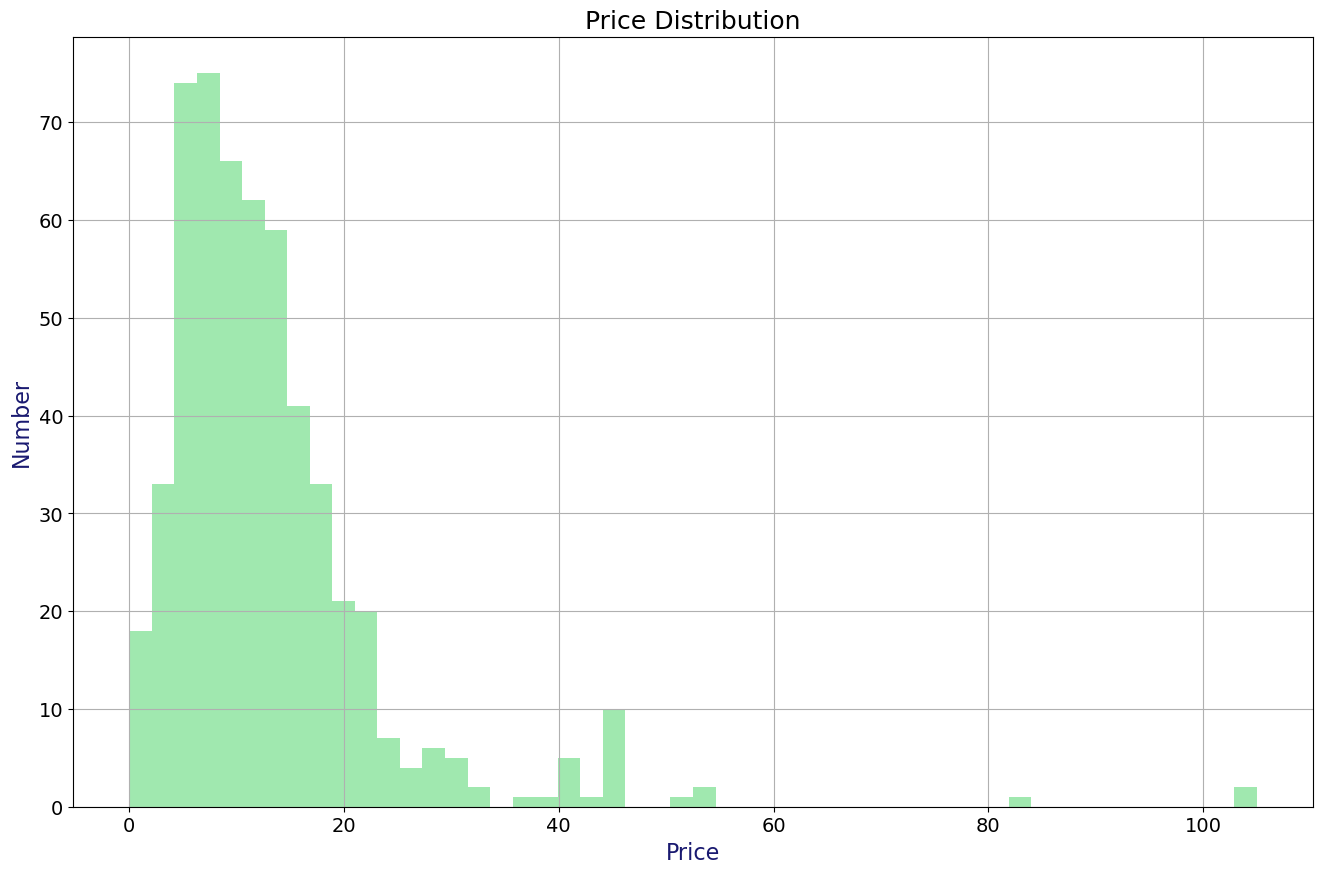

In [11]:
fig = plt.subplots(figsize=(16, 10))
df.price.plot(kind='hist', fontsize=14,
              grid=True, bins=50, color=['#A0E8AF'])
plt.title("Price Distribution", fontdict = {'fontsize' : 18})
plt.xlabel("Price", size=16, color="midnightblue")
plt.ylabel("Number", size=16, color="midnightblue")
plt.show()

#### Determine what is the maximum, minimum, mean, median price (use the max, min, mean, median functions)

In [12]:
df.agg({"price": ["max", "min", "mean", "median"]})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


#### The maximum price? Answer: 

In [13]:
df.agg({"price": ["max"]})

,price
max,105


#### The minimum price? Answer: 

In [14]:
df.agg({"price": ["min"]})

,price
min,0


#### Average price? Answer: 

In [15]:
df.agg({"price": ["mean"]})

,price
mean,13.1


#### Median price? Answer: 

In [16]:
df.agg({"price": ["median"]})

,price
median,11.0


### Search and sort data

#### Which rating in the dataset is the highest? Answer:

In [17]:
df.agg({"user_rating": ["max"]})

,user_rating
max,4.9


#### How many books have this rating? Answer:

In [18]:
df.query('user_rating == 4.9')["user_rating"].count()

52

#### Which book has the most reviews? Answer:

In [19]:
max_rev = df["reviews"].agg(["max"])
df.query("reviews == @max_rev.values[0]")

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


#### Of the books in the Top 50 in 2015, which book is the most expensive (you can use an intermediate date frame)? Answer:

In [20]:
df_pr = df.query("year == 2015")
max_pr= df_pr["price"].agg(["max"])
df_pr.query("price == @max_pr.values[0]")

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


#### How many Fiction books were in the Top 50 in 2010 (use `&`)? Answer:

In [21]:
df.query("year == 2010 & genre == 'Fiction'")["name"].count()

20

#### How many books with a rating of 4.9 were ranked in 2010 and 2011 (use `|` or the `isin` function)? Answer:

In [22]:
df_pr = df.query("year == 2010 | year == 2011")
df_pr.query("user_rating == 4.9")["name"].count()

1

#### And finally, let's sort in ascending order of price all the books that were ranked in 2015 and cost less than 8 dollars (use the `sort_values` function).

In [23]:
df_pr = df.query("year == 2015 & price <= 8").sort_values("price")
df_pr

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


#### Which book is last in the sorted list? Answer:

In [24]:
df_pr.tail(1)["name"]

191    Jesus Calling: Enjoying Peace in His Presence ...
Name: name, dtype: object

### Aggregating data and joining tables
The last section of this homework includes more advanced functions. But don't worry, pandas makes all the operations simple and straightforward.

To begin, let's look at the maximum and minimum prices for each genre (use the groupby and agg functions, and use max and min to calculate the minimum and maximum values). Don't take all the columns, select only the ones you need

In [25]:
df_pr = df.groupby("genre").agg({"price": ["max", "min"]})
df_pr

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

#### The maximum price for the Fiction genre: Answer

In [26]:
df_pr.loc['Fiction', "price"]['max']

82

#### Minimum price for the genre Fiction: Answer

In [27]:
df_pr.loc['Fiction', "price"]['min']

0

#### Maximum price for the genre Non Fiction: Answer

In [28]:
df_pr.loc['Non Fiction', "price"]['max']

105

#### Minimum price for the genre Non Fiction: Answer

In [29]:
df_pr.loc['Non Fiction', "price"]['min']

0

Now create a new dataframe that will contain the number of books for each author (use the `groupby` and `agg` functions, and use count to count the number). Don't take all the columns, just the ones you need.

In [30]:
df_aut = df.groupby("author")["name"].agg(["count"])
df_aut

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


#### What is the size of the table? Answer:

In [31]:
df_aut.shape

(248, 1)

#### Which author has the most books? Answer:

In [32]:
max_c = df_aut["count"].max()
df_aut.query("count == @max_c")

,count
author,
Jeff Kinney,12


#### How many books are there by this author? Answer:

In [33]:
df_aut.loc['Jeff Kinney', "count"]

12

Now create a second dataframe that will contain the average rating for each author (use the groupby and agg functions, use mean to calculate the average). Don't take all the columns, just select the ones you need

In [34]:
df_rat = df.groupby("author")["user_rating"].agg(["mean"])
df_rat

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


#### Which author has the lowest average rating? Answer:

In [35]:
min_r = df_rat["mean"].min()
df_rat.query("mean == @min_r")

,mean
author,
Donna Tartt,3.9


#### What is the average rating for this author? Answer:

In [36]:
df_rat.loc['Donna Tartt', "mean"]

3.9

Join the last two dataframes so that you can see the number of books and the average rating for each author (use the concat function with axis=1). Save the result to a variable

In [37]:
df_new = pd.concat([df_aut, df_rat], axis=1)
df_new = df_new.rename(columns={"count": "book_count", "mean": "average_rating"})
df_new

,book_count,average_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Sort the dataframe by increasing number of books and increasing rating (use the sort_values function)

In [38]:
df_new = df_new.sort_values(["book_count", "average_rating"])
df_new.head(5)

,book_count,average_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


#### Which author is first in the list?

In [39]:
df_new.head(1)

,book_count,average_rating
author,,
Muriel Barbery,1,4.0


### Visualization

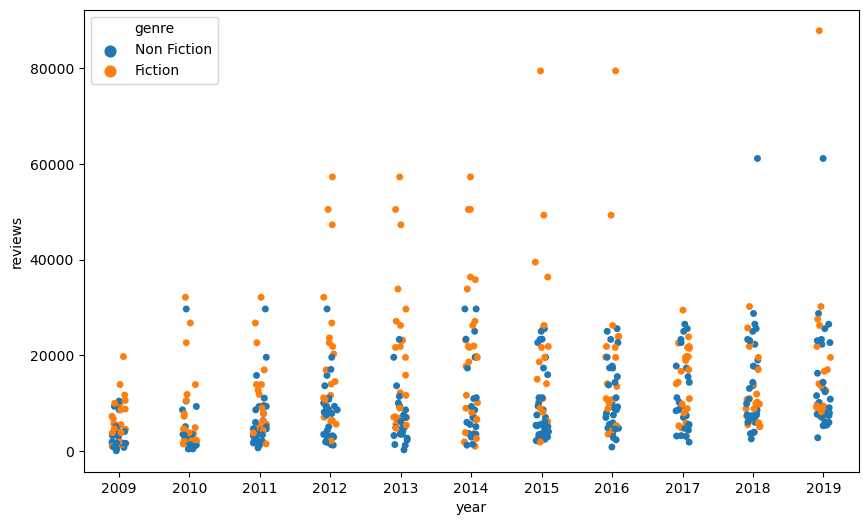

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x='year', y='reviews', hue='genre', data=df)
plt.show()

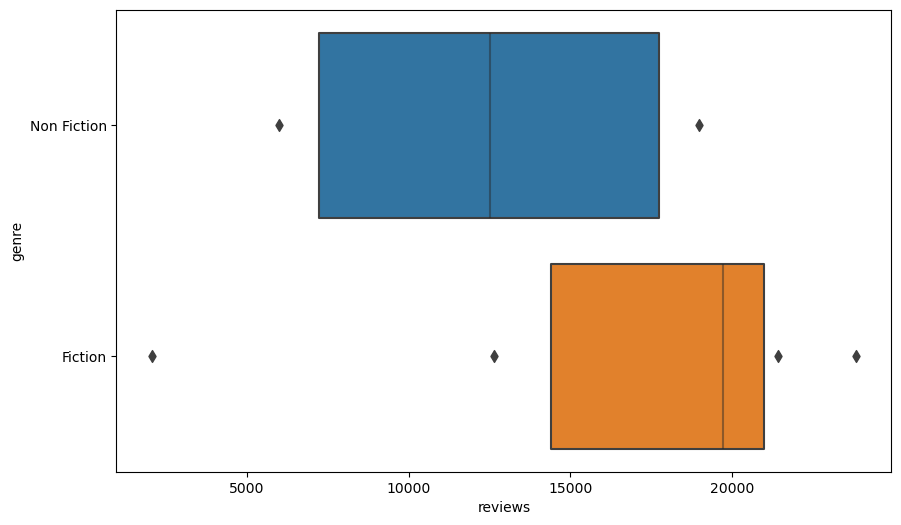

In [41]:
df2 = df.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(x="reviews", y="genre", data=df2)
plt.show()

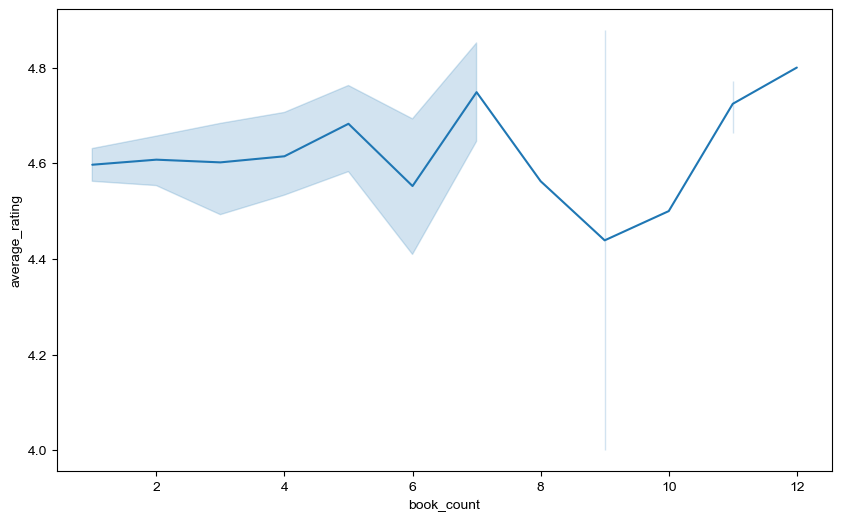

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x="book_count", y="average_rating", data=df_new, sort=False)
plt.show()